In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Барьерные опционы

Пример 1. Оцените стоимость опциона down-and-in колл с датой экспирации через 6 месяцев, если текущая стоимость акции 100, волатильность акции 30\%, барьер 100, цена страйк 90, компенсационная выплата 3. Безрисковая ставка 8\%, стоимость переноса позиции 4\%.

In [5]:
S = 100
H = 100
K = 90
R = 3
T = 0.5
r = 0.08
b = 0.04
q = r - b
sigma = 0.3

In [6]:
def call_di(S, H, K, T, r, q, sigma):
  if S > H:
    return C + E
  else:
    return A - B + D + E

# down-and-in call
eta = 1
phi = 1

mu = (b-sigma**2/2)/sigma**2
lam = np.sqrt(mu**2 + 2*r/sigma**2)

x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

E = R*np.exp(-r*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))


print('down-and-in call = ', call_di(S, H, K, T, r, q, sigma))

down-and-in call =  14.88162080496874


В условиях примера 1 напишите универсальную функцию для оценки стоимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу:
\
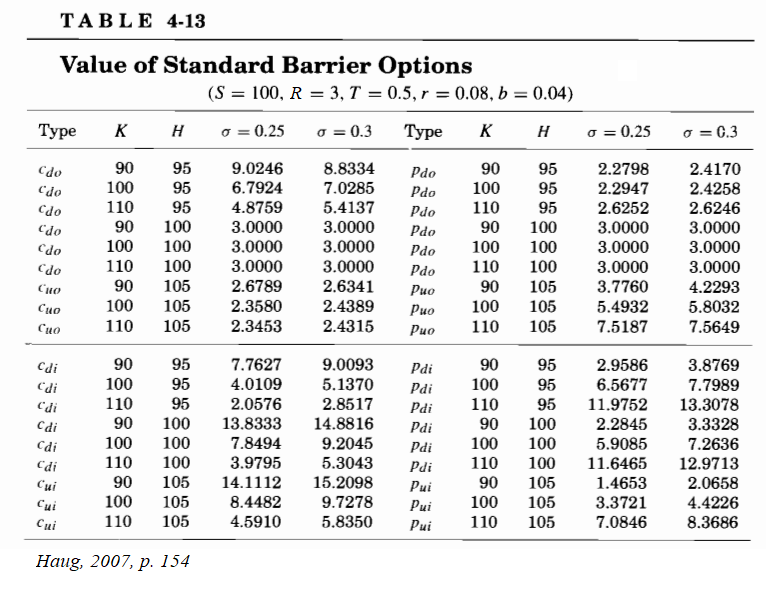

In [7]:
def x1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def x2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def z(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

def A(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def B(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def C(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def D(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def E(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*np.exp(-r*T)*(norm.cdf(eta*x2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T)))

def F(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*((H/S)**(mu+lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta))+(H/S)**(mu-lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta) - 2*eta*lam*sigma*np.sqrt(T)))

def di_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def di_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = -1
        phi = -1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
###
def do_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def do_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call):
    if option_type == "Up-and-out" and is_call == True:
        exact_calc_result = uo_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-out" and is_call == False:
        exact_calc_result = uo_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == True:
        exact_calc_result = do_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == False:
        exact_calc_result = do_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == True:
        exact_calc_result = ui_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == False:
        exact_calc_result = ui_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == True:
        exact_calc_result = di_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == False:
        exact_calc_result = di_barrier_put(S, H, K, R, T, r, b, sigma)
    else:
        print("Unknown option type")
        return
    return exact_calc_result

In [8]:
K = 90
H = 95
sigma = 0.25
S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08
option_type = "Down-and-out"
is_call = True
barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)

9.02456769496686

## Задача

Задача. Проварьируйте переменные $H$, $K$, $\sigma$, типы опционов и
*   постройте таблицу 4-13 ([Haug, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=sharing)),
*   постройте поверхности для различных $K=\{90, 100, 110\}$, $H=\{95, 100, 105\}$ и $\sigma=0.3$.

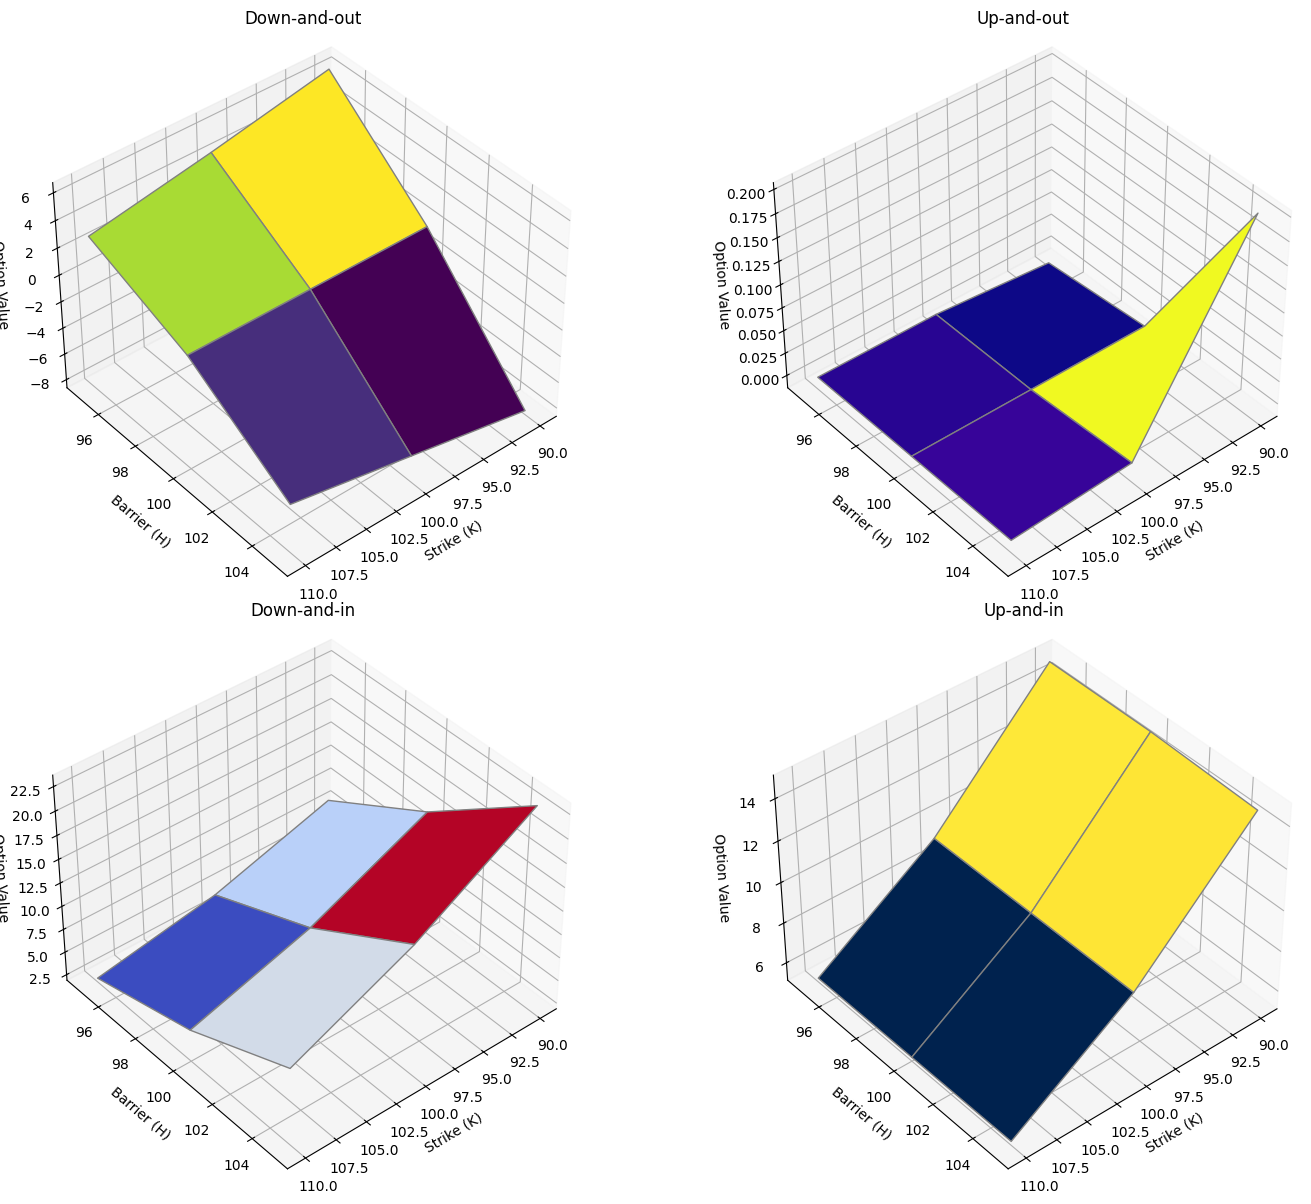

In [9]:
S = 100  
r = 0.08  
b = 0.04  
T = 0.5  

K_values = [90, 100, 110]
H_values = [95, 100, 105]
sigma = 0.3  

option_types = ["Down-and-out", "Up-and-out", "Down-and-in", "Up-and-in"]

results = {}

for K in K_values:
    for H in H_values:
        results[(K, H)] = {}
        for option_type in option_types:
            is_call = True 
            value = barrier_option(option_type, S, H, K, 0, T, r, b, sigma, is_call)
            results[(K, H)][option_type] = value

X, Y = np.meshgrid(K_values, H_values)
Z_dict = {option_type: np.zeros(X.shape) for option_type in option_types}

for i, K in enumerate(K_values):
    for j, H in enumerate(H_values):
        for option_type in option_types:
            Z_dict[option_type][j, i] = results[(K, H)][option_type]

fig, axs = plt.subplots(2, 2, figsize=(16, 12), subplot_kw={"projection": "3d"})
ax_flat = axs.flatten()

cmap_list = ['viridis', 'plasma', 'coolwarm', 'cividis']

for idx, option_type in enumerate(option_types):
    ax = ax_flat[idx]
    ax.plot_surface(X, Y, Z_dict[option_type], cmap=cmap_list[idx], edgecolor="gray")
    ax.set_title(option_type)
    ax.set_xlabel("Strike (K)")
    ax.set_ylabel("Barrier (H)")
    ax.set_zlabel("Option Value")
    ax.view_init(elev=40, azim=50) 

plt.tight_layout()
plt.show()

# Структурные продукты с полной защитой капитала

## СП с использованием барьерных опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется
рост акции. Постройте структурный продукт с полной гарантией
возврата инвестированного капитала и использованием барьерных
опционов:

а) включаемый (knock-in) барьер 110 рублей, цена акции через год –
105 руб.,

б) выключаемый (knock-out) барьер 90 рублей, цена акции через год –
120 руб.

Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1
день.

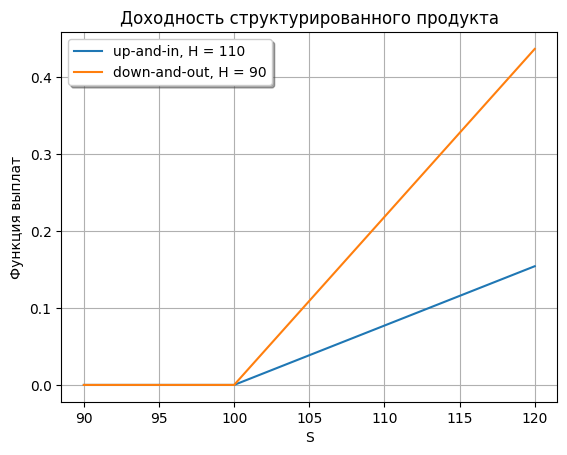

In [10]:
S0 = 100
T = 1
N = 100000
sigma = 0.3
r = 0.07
S_data = np.linspace(90, 120, 100)

H_1 = 110
K_1 = 105
option_type = 'Up-and-in'
is_call = True
call_1 = barrier_option(option_type, S0, H_1, K_1, 0, T, r, 0, sigma, is_call)

H_2 = 90
K_2 = 120
option_type = 'Down-and-out'
is_call = True
call_2 = barrier_option(option_type, S0, H_2, K_2, 0, T, r, 0, sigma, is_call)

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / call_1
PR_1 = K_1 * Q_1/ N
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_data - S0) / S0 )

Q_2 = (N - da) / call_2
PR_2 = K_2 * Q_2/ N
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_data - S0) / S0 )

plt.plot(S_data, r_sp_1, label = 'up-and-in, H = 110')
plt.plot(S_data, r_sp_2, label = 'down-and-out, H = 90')
plt.title('Доходность структурированного продукта')
plt.xlabel('S')
plt.ylabel('Функция выплат')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

## Задача

Задача. Сравните полученные результаты с функциями выплат, полученными при использовании гэп опционов, бинарных опционов (ЛБ2). Подкрепите выводы иллюстративными графиками.

Постройте зависимость стоимости барьерного опциона (Knock-out call, Knock-in call, Knock-out put Knock-in put) от расположения барьера: x – это барьер в процентах от цены (50, 500), y - стоимость барьерного опциона в % от стоимости обычного call.

Постройте графики зависимость КоУ от расположения барьера относительно страйка для продуктов: с knock-out call, knock-in call и ванильный кол; с knock-out put, knock-in put и ванильный call.

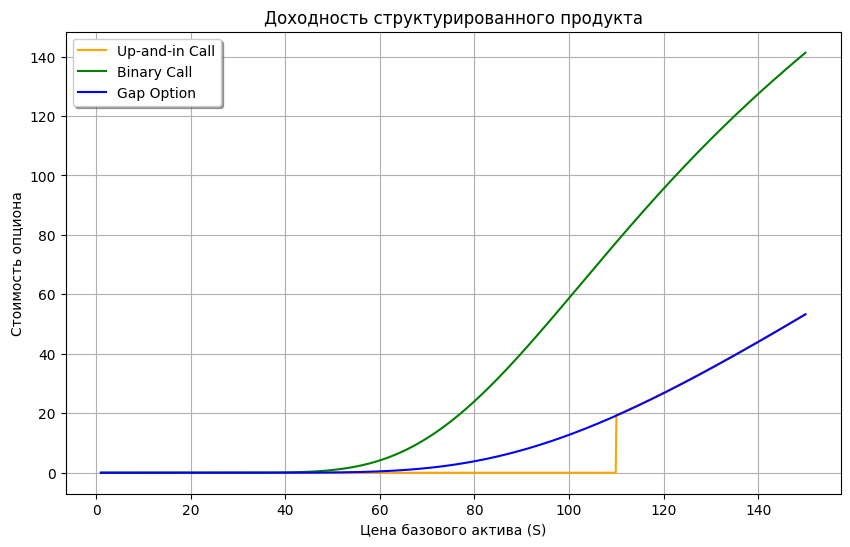

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class OptionPricing:
    def __init__(self, S, K, T, r, q, sigma):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.q = q
        self.sigma = sigma

    def _d1_d2(self):
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)
        return d1, d2

    def binary_option(self, option_type):
        d1, d2 = self._d1_d2()
        if option_type == 'cash-or-nothing':
            return np.exp(-self.r * self.T) * norm.cdf(d2)
        elif option_type == 'asset-or-nothing':
            return self.S * np.exp(-self.q * self.T) * norm.cdf(d1)

    def gap_option(self, K_1, K_2, option_type):
        d1 = (np.log(self.S / K_2) + (self.r - self.q + self.sigma**2 / 2) * self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)
        if option_type == 'call':
            return self.S * np.exp(-self.q * self.T) * norm.cdf(d1) - K_1 * np.exp(-self.r * self.T) * norm.cdf(d2)
        elif option_type == 'put':
            return K_1 * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S * np.exp(-self.q * self.T) * norm.cdf(-d1)

    def barrier_option(self, H, option_type, is_call=True):
        if self.S >= H:
            d1 = (np.log(self.S / self.K) + (self.r - self.q + 0.5 * self.sigma**2) * (self.T)) / (self.sigma * np.sqrt(self.T))
            d2 = d1 - self.sigma * np.sqrt(self.T)
            return self.S * np.exp(-self.q * self.T) * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
        return 0

# Основные параметры
S0 = 100
T = 1
sigma = 0.3
r = 0.07
H = 110
K = 105
K2 = H
q = 0
option_type_call = 'call'

S_data = np.linspace(1, 150, 1000)

# Создание объектов для разных опционов
call_barrier = []
call_binary = []
call_gap = []

for S in S_data:
    option = OptionPricing(S, K, T, r, q, sigma)
    call_barrier.append(option.barrier_option(H, 'Up-and-in'))
    call_binary.append(option.binary_option('asset-or-nothing'))
    call_gap.append(option.gap_option(K, K2, option_type_call))

# Графики
plt.figure(figsize=(10, 6))
plt.plot(S_data, call_barrier, label='Up-and-in Call', color='orange')
plt.plot(S_data, call_binary, label='Binary Call', color='green')
plt.plot(S_data, call_gap, label='Gap Option', color='blue')

plt.title('Доходность структурированного продукта')
plt.xlabel('Цена базового актива (S)')
plt.ylabel('Стоимость опциона')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

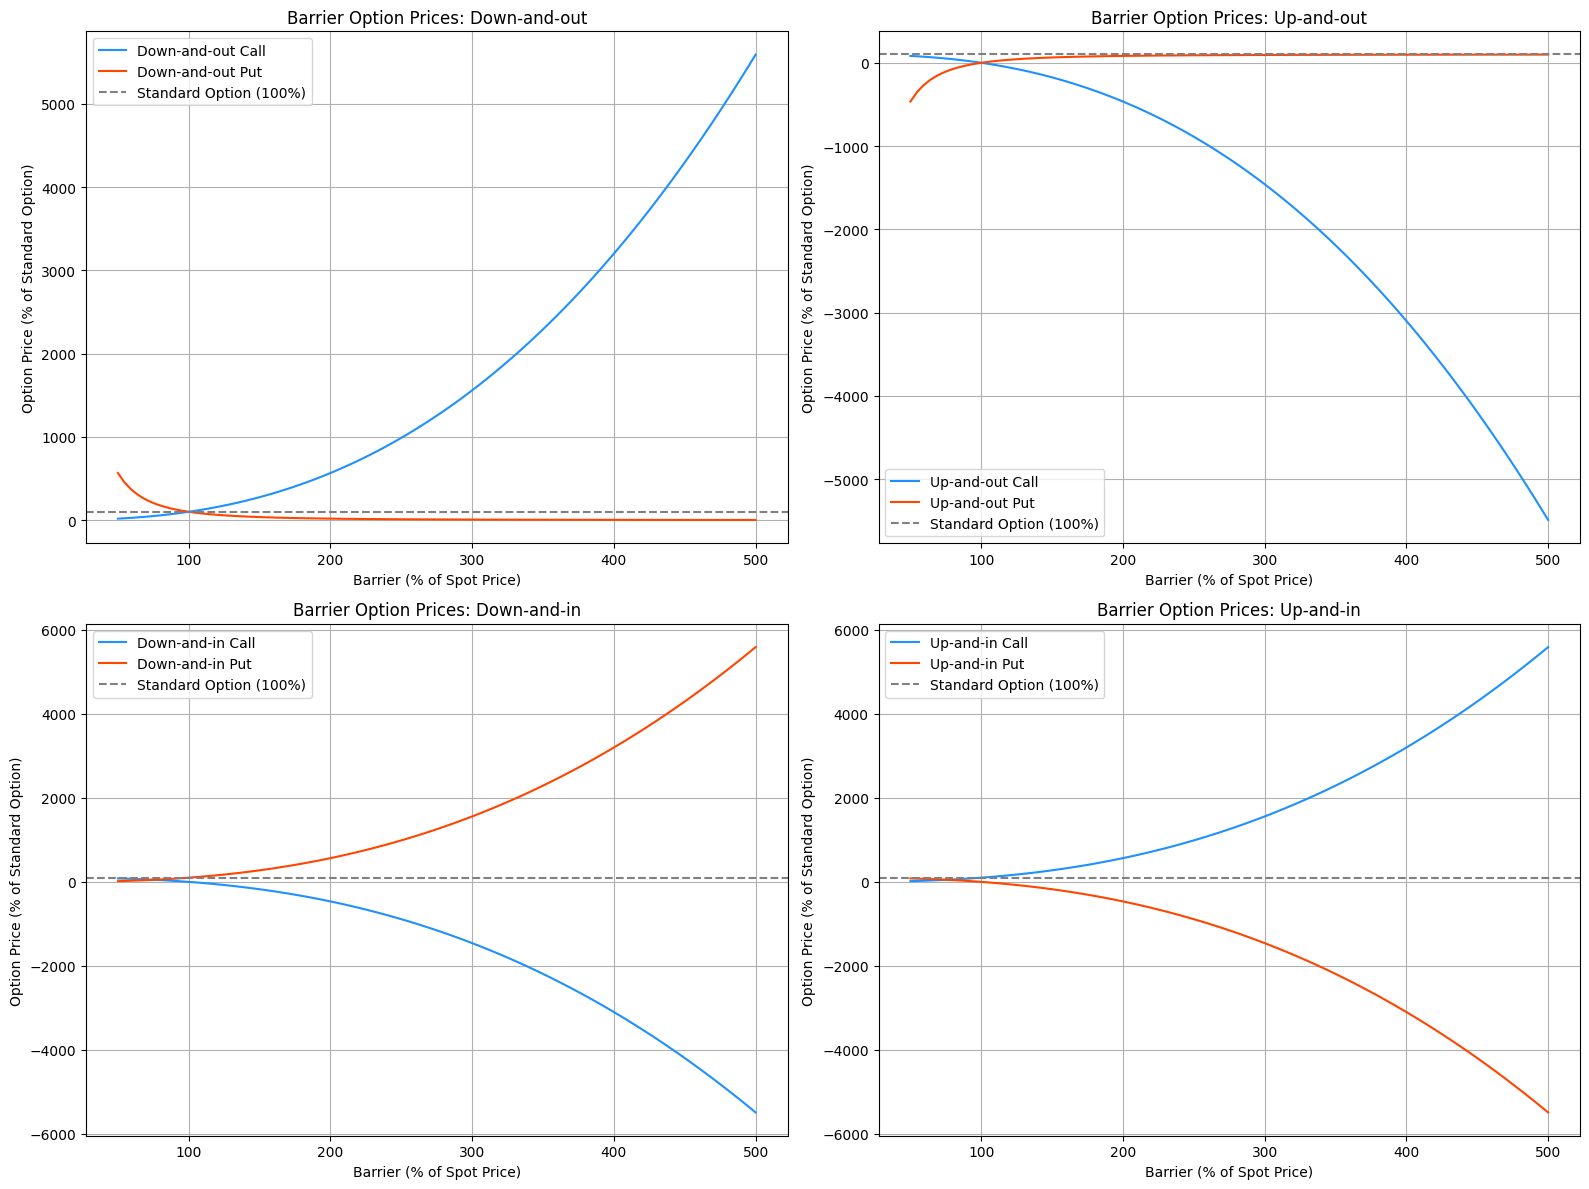

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class OptionPricing:
    def __init__(self, S, K, r, T, sigma):
        self.S = S
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma

    def _d1_d2(self):
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)
        return d1, d2

    def bs_price(self, option_type):
        d1, d2 = self._d1_d2()
        if option_type == "call":
            return self.S * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
        elif option_type == "put":
            return self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S * norm.cdf(-d1)

    def barrier_option_price(self, B, option_type="call", barrier_type="Down-and-out"):
        standard_price = self.bs_price(option_type)
        if barrier_type == "Down-and-out":
            if option_type == "call":
                return standard_price * (B / self.S)**(2 * self.r / self.sigma**2)
            elif option_type == "put":
                return standard_price * (self.S / B)**(2 * self.r / self.sigma**2)
        elif barrier_type == "Up-and-out":
            if option_type == "call":
                return standard_price * (1 - (B / self.S)**(2 * self.r / self.sigma**2))
            elif option_type == "put":
                return standard_price * (1 - (self.S / B)**(2 * self.r / self.sigma**2))
        elif barrier_type == "Down-and-in":
            if option_type == "call":
                return standard_price * (1 - (B / self.S)**(2 * self.r / self.sigma**2))
            elif option_type == "put":
                return standard_price * (B / self.S)**(2 * self.r / self.sigma**2)
        elif barrier_type == "Up-and-in":
            if option_type == "call":
                return standard_price * (B / self.S)**(2 * self.r / self.sigma**2)
            elif option_type == "put":
                return standard_price * (1 - (B / self.S)**(2 * self.r / self.sigma**2))

# Основные параметры
S0 = 100  
K = 100  
r = 0.05  
T = 1.0  
sigma = 0.2  
barriers = np.linspace(0.5*S0, 5*S0, 100)
option_types = ["Down-and-out", "Up-and-out", "Down-and-in", "Up-and-in"]

# Создание объектов для расчета цен опционов
option_call = OptionPricing(S0, K, r, T, sigma)
call_price = option_call.bs_price(option_type="call")
put_price = option_call.bs_price(option_type="put")

# Сбор результатов
results = {opt_type: {"call": [], "put": []} for opt_type in option_types}
for opt_type in option_types:
    results[opt_type]["call"] = [option_call.barrier_option_price(b, "call", opt_type) / call_price * 100 for b in barriers]
    results[opt_type]["put"] = [option_call.barrier_option_price(b, "put", opt_type) / put_price * 100 for b in barriers]

# Построение графиков
plt.figure(figsize=(16, 12))

colors = {'call': 'dodgerblue', 'put': 'orangered'}
for i, opt_type in enumerate(option_types, start=1):
    plt.subplot(2, 2, i)
    plt.plot(barriers, results[opt_type]["call"], label=f"{opt_type} Call", color=colors['call'])
    plt.plot(barriers, results[opt_type]["put"], label=f"{opt_type} Put", color=colors['put'])
    plt.axhline(100, color="gray", linestyle="--", label="Standard Option (100%)")
    plt.xlabel("Barrier (% of Spot Price)")
    plt.ylabel("Option Price (% of Standard Option)")
    plt.title(f"Barrier Option Prices: {opt_type}")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

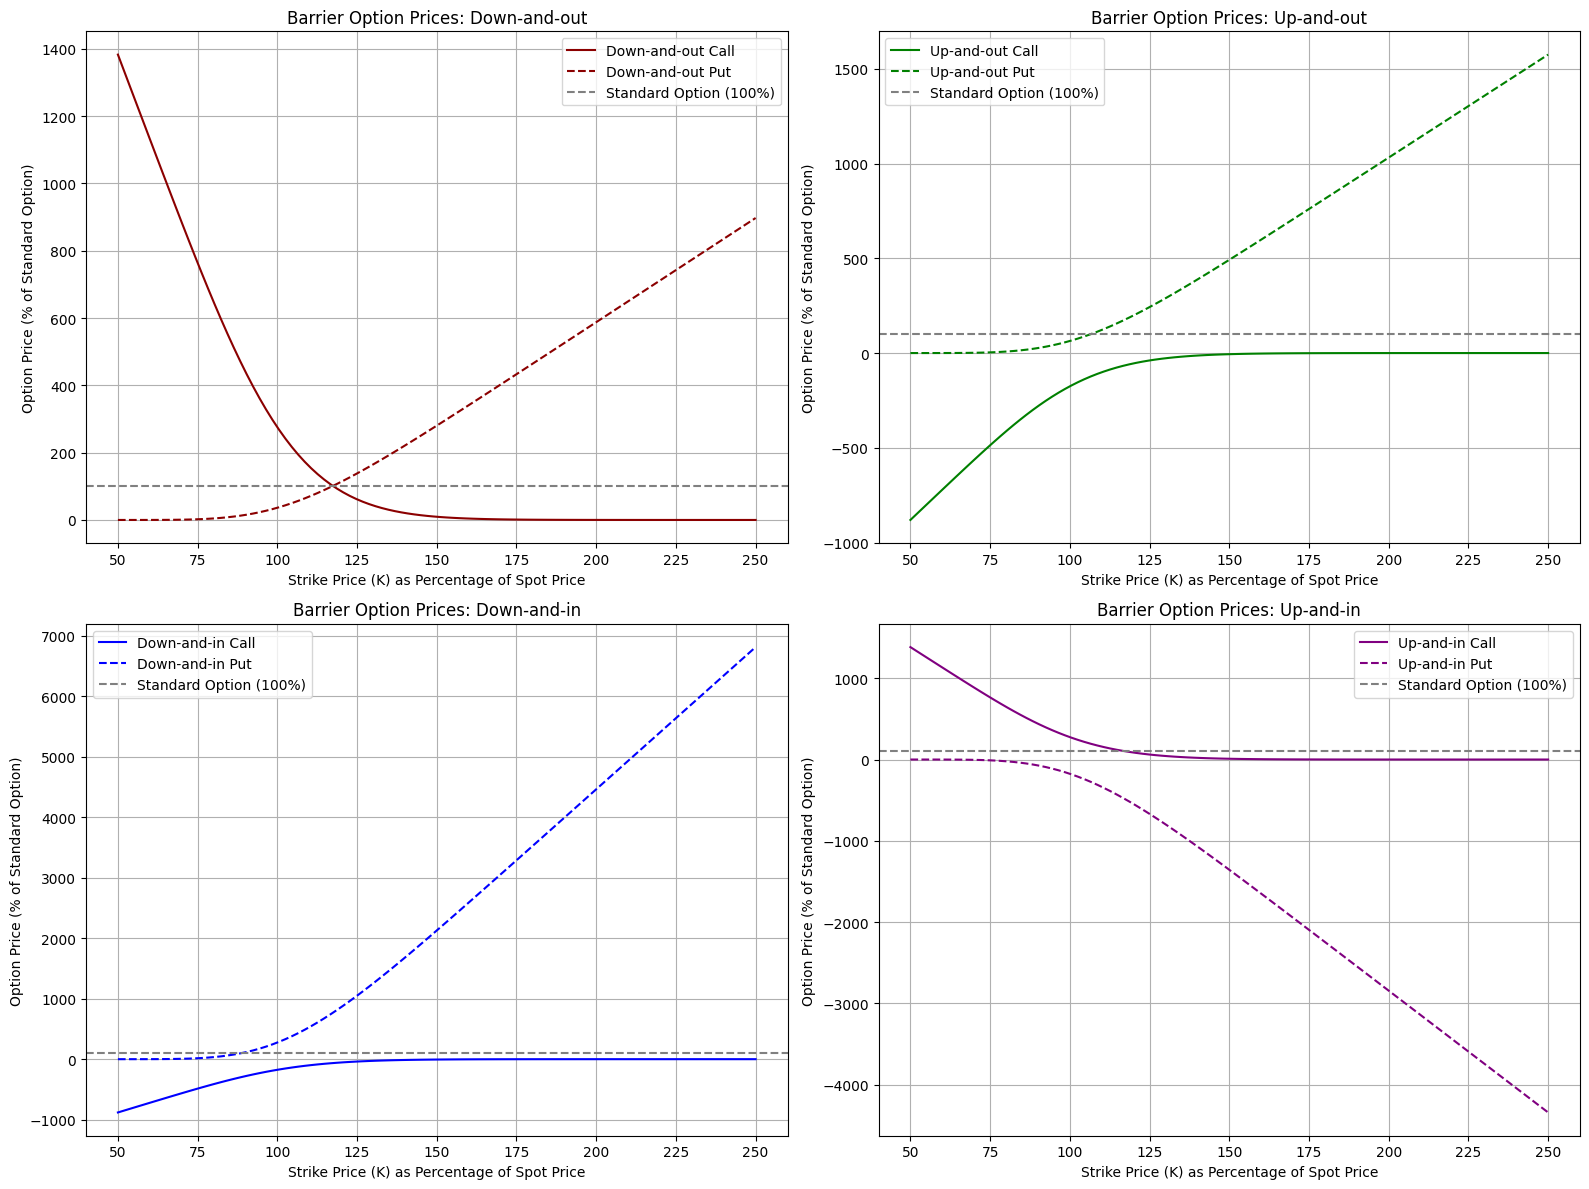

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Функция для расчета цены европейского опциона по Блэку-Шоулзу
def bs_price(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Функция для расчета барьерного опциона
def barrier_option_price(S0, K, r, T, sigma, B, option_type="call", barrier_type="Down-and-out"):
    standard_price = bs_price(S0, K, r, T, sigma, option_type)
    if barrier_type == "Down-and-out":
        if option_type == "call":
            return standard_price * (B / S0)**(2 * r / sigma**2)
        elif option_type == "put":
            return standard_price * (S0 / B)**(2 * r / sigma**2)
    elif barrier_type == "Up-and-out":
        if option_type == "call":
            return standard_price * (1 - (B / S0)**(2 * r / sigma**2))
        elif option_type == "put":
            return standard_price * (1 - (S0 / B)**(2 * r / sigma**2))
    elif barrier_type == "Down-and-in":
        if option_type == "call":
            return standard_price * (1 - (B / S0)**(2 * r / sigma**2))
        elif option_type == "put":
            return standard_price * (B / S0)**(2 * r / sigma**2)
    elif barrier_type == "Up-and-in":
        if option_type == "call":
            return standard_price * (B / S0)**(2 * r / sigma**2)
        elif option_type == "put":
            return standard_price * (1 - (B / S0)**(2 * r / sigma**2))

# Основные параметры
S0 = 100
K = 100
r = 0.05
T = 1.0
sigma = 0.2
H = 150

K_range = np.linspace(0.5*S0, 2.5*S0, 100)
option_types = ["Down-and-out", "Up-and-out", "Down-and-in", "Up-and-in"]

# Цена стандартных опционов
call_price = bs_price(S0, K, r, T, sigma, option_type="call")
put_price = bs_price(S0, K, r, T, sigma, option_type="put")

# Сбор результатов для барьерных опционов
results = {opt_type: {"call": [], "put": []} for opt_type in option_types}
for opt_type in option_types:
    results[opt_type]["call"] = [barrier_option_price(S0, K, r, T, sigma, H, "call", opt_type) / call_price * 100 for K in K_range]
    results[opt_type]["put"] = [barrier_option_price(S0, K, r, T, sigma, H, "put", opt_type) / put_price * 100 for K in K_range]

# Построение графиков
plt.figure(figsize=(16, 12))

# Цвета для линий
colors = {
    "Down-and-out": "darkred",
    "Up-and-out": "green",
    "Down-and-in": "blue",
    "Up-and-in": "purple"
}

for i, opt_type in enumerate(option_types, start=1):
    plt.subplot(2, 2, i)
    plt.plot(K_range, results[opt_type]["call"], label=f"{opt_type} Call", color=colors[opt_type])
    plt.plot(K_range, results[opt_type]["put"], label=f"{opt_type} Put", color=colors[opt_type], linestyle="--")
    plt.axhline(100, color="gray", linestyle="--", label="Standard Option (100%)")
    plt.xlabel("Strike Price (K) as Percentage of Spot Price")
    plt.ylabel("Option Price (% of Standard Option)")
    plt.title(f"Barrier Option Prices: {opt_type}")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Торговая стратегия (индивидуально)

## Проект

Задача. Торговая стратегия на основе опционного контракта Callable Bull or Bear Contract (CBBC).


[CBBC](https://https://www.hkex.com.hk/-/media/HKEX-Market/Products/Securities/Structured-Products/Product-Sheet/ProductSheet_CBBC.pdf) -- барьерный инструмент с эффектом рычага, в котором отслеживается цена базового актива.
Покупка (продажа) контракта Callable Bull (Bear) подразумевает, что инвестор занял длинную (короткую) позицию по базовому активу и имеет право на прибыль, когда стоимость этого актива вырастет (упадет).

Для контракта на повышение цены (Сallable Bull) цена включения (тригер) устанавливается либо на уровне цены страйка, либо выше. Обязательное событие включения (Mandatory Call Even, MCE) происходит, когда цена базового актива достигает цены тригера. Когда это происходит, торговля контрактом прекращается, сам контракт отзывается, и держатель контракта получает компенсацию в соответствии с заранее установленными условиями. Для контракта на понижение цены, цена включения (тригер) устанавливается либо на уровне цены страйка, либо ниже.

Разработайте торговую стратегию:
1.  Постройте прогноз дневных максимумов и минимумов для базового актива (например, через регрессию).
1.  Сигнал на покупку генерируется, когда прогнозируемый дневной максимум не ниже цены контракта.
1.  Купите базовый актив, когда сигнал на покупку наблюдается в течение $m$ последовательных дней.
1.  Закройте длинную позицию, когда сигнал на покупку исчезает в течение $m$ последовательных дней, происходит MCE или истекает срок действия контракта CBBC.
1.  Если позиция закрывается до MCE и срока действия контракта, то повторите шаги 2–4.

Проварьируйте параметр $m$ и проанализируейте P&L торговой стратегии.

[Исторические данные CBBC](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)  

Статья ([Cheung et.al., 2010](https://www.sciencedirect.com/science/article/pii/S0927538X09000778?via%3Dihub)) или ([Cheung et.al., 2010](https://drive.google.com/file/d/1psFxTOZ8nf5IVuBcWKuKTEQ-JeJsRGPI/view?usp=drive_link))


In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import yfinance as yf
def load_dji_data(start_date, end_date):
    """
    Загружает данные DJI за указанный период.
    """
    data = yf.download("^DJI", start=start_date, end=end_date)
    return data.dropna()


def preprocess_dji_data(data):
    """
    Подготавливает данные DJI для модели VAR, добавляя лаги.
    """
    columns_of_interest = ['High', 'Low']
    data = data[columns_of_interest].copy()
    data['Lag_High'] = data['High'].shift(1)
    data['Lag_Low'] = data['Low'].shift(1)
    return data.dropna()


def train_var_model(data, maxlags=7):
    """
    Обучает модель VAR на данных.
    """
    model = VAR(data[['High', 'Low']])
    return model.fit(maxlags=maxlags)


def forecast_dji(model, data, window, steps=1):
    """
    Выполняет прогнозирование на основе модели VAR.
    """
    forecast_res = np.zeros((len(data), 2))
    for i in range(window, len(data)):
        forecast_res[i] = model.forecast(data[['High', 'Low']].values[i - window:i], steps=1)
    return pd.DataFrame(forecast_res[window:], columns=['High', 'Low'], index=data.index[window:])


def load_cbbc_data(file_path):
    """
    Загружает данные CBBC из Excel и приводит к требуемому формату.
    """
    cbbc_data = pd.read_excel(file_path)
    cbbc_data.columns = cbbc_data.columns.str.strip().str.replace(' ', '_').str.lower()
    features = ['trade_date', 'call_level', 'strike_level', 'maturity_date', 'bull/bear']
    cbbc_data = cbbc_data[features]
    
    
    cbbc_data.rename(columns={'trade_date': 'Date'}, inplace=True)
    cbbc_data = cbbc_data.iloc[::-1]
    cbbc_data.set_index('Date', inplace=True)
    cbbc_data.index = pd.to_datetime(cbbc_data.index)
    cbbc_data.index = cbbc_data.index.strftime('%Y-%m-%d')
    cbbc_data
    return cbbc_data


def trading_strategy(forecast, cbbc_data, m=2):
    """
    Реализует торговую стратегию на основе CBBC.
    """
    actions = np.zeros(len(forecast) + 1, dtype=object)
    actions[0] = 'BUY'
    last_action = 'BUY'
    cnt_h, cnt_c = 0, 0

    for i in range(len(forecast)):
        if forecast.index[i] == cbbc_data['maturity_date'][i]:
            break

        if forecast['High'].iloc[i] >= cbbc_data['strike_level'].iloc[i]:
            cnt_h += 1
        else:
            cnt_h = 0

        if forecast['Low'].iloc[i] < cbbc_data['strike_level'].iloc[i]:
            cnt_c += 1
        else:
            cnt_c = 0

        if cnt_h == m and last_action == 'SELL':
            actions[i + 1] = 'BUY'
            last_action = 'BUY'

        if cnt_c == m and last_action == 'BUY':
            actions[i + 1] = 'SELL'
            last_action = 'SELL'

    return actions[:len(forecast)]


def calculate_pnl(actions, forecast, cbbc_data):
    """
    Рассчитывает прибыль и убытки (P&L) стратегии.
    """
    pnl = []
    for i in range(len(actions) - 1):
        if actions[i] == 'BUY' and actions[i + 1] == 'SELL':
            pnl.append(cbbc_data['strike_level'].iloc[i] - forecast['Low'].iloc[i])
        elif actions[i] == 'SELL' and actions[i + 1] == 'BUY':
            pnl.append(forecast['High'].iloc[i] - cbbc_data['strike_level'].iloc[i])
    return pnl
# Данные СП
cbbc_data = load_cbbc_data("data.xlsx")

# Данные для модели DJI
start_date_test = '2023-01-01'
end_date_test = cbbc_data.index[0]

dji_data = load_dji_data(start_date_test, end_date_test)
dji_data = preprocess_dji_data(dji_data)


# обучение модели VAR
var_model = train_var_model(dji_data)


# Данные для прогнозирования DJI
start_date = cbbc_data.index[0]
end_date = '2024-11-21'
data = load_dji_data(start_date, end_date)
data.index = pd.to_datetime(data.index)
data.index = data.index.strftime('%Y-%m-%d')
window=7
forecast = forecast_dji(var_model, preprocess_dji_data(data),window=7, steps=1)

# применение торговой стратегии
forecast = forecast.loc[forecast.index.isin(cbbc_data.index)]
forecast.index = pd.to_datetime(forecast.index)
forecast.index = forecast.index.strftime('%Y-%m-%d')

cbbc_data = cbbc_data[cbbc_data.index.isin(forecast.index)]

cbbc_data = cbbc_data[cbbc_data.index.isin(forecast.index)]
actions = trading_strategy(forecast, cbbc_data, m=2)

#  PL
pnl = calculate_pnl(actions, forecast, cbbc_data)
actions

[*********************100%%**********************]  1 of 1 completed
c:\Users\OneSmiLe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
[*********************100%%**********************]  1 of 1 completed
C:\Users\OneSmiLe\AppData\Local\Temp\ipykernel_10740\4060528987.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if forecast.index[i] == cbbc_data['maturity_date'][i]:


array(['BUY', 0, 'SELL', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=object)

# Примеры на барьерные опционы

Zhang, c. 223

Пример 2.
Вычислите цену опциона down-and-in колл, если цена страйк  равна 98, цена исполнения через полгода 92. Цена акции 100, барьер 95, безрисковая ставка 8%, дивидендная доходность 3%, волатильность 20%.

Вычислить значение компенсационной выплаты по полугодовому барьерному опциону down-and-in колл на начальный момент, при условии, что эта выплата равна 1.5 на дату экспирации, если барьер не достигнут. Цена акции 100, барьер 95, волатильность 0.2, безрисковая ставка 0.08, дивидентная ставка 0.03.

In [15]:
S = 100
H = 95
K = 98

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95

d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  2.7338748685456857
rebate =  0.448464125401398


Задача. В условиях примера 2 вычислить стоимость опциона, если цена страйк 92 (ниже барьера).

In [16]:
K = 92
call = barrier_option('Down-and-in',S, H, K, R, T, r, b, sigma, is_call=True)
print(f"call price = {call}")


call price = 4.892727517998941
